# Description

Learn how to do word embedding using Word2Vec in gensim

In [502]:
##common modules
import pandas as pd #for data handling
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from time import time # to time the operations

In [503]:
import gensim
from gensim.models import Word2Vec

# Example dataset description

The dataset used for this tutorial is from Kaggle Dataset( https://www.kaggle.com/CooperUnion/cardataset) This cars dataset includes features such as make, model, year, engine, and other properties of the car. We will use these features to generate the word embeddings for each make model and then compare the similarities between different make model. The following dataframe shows the detail information of this dataset.

## load dataset & get basic info

In [504]:
df = pd.read_csv('data/data.csv')

In [505]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [506]:
df.shape

(11914, 16)

## data preprocessing

In [507]:
df['Make_Model']= df['Make']+ " " + df['Model']

In [508]:
df_Count_Make_Model = df.groupby('Make_Model').size().reset_index()

In [509]:
df_Count_Make_Model.columns = ['Make_Model','Count']

In [510]:
df_Count_Make_Model.head()

,Make_Model,Count
0,Acura CL,9
1,Acura ILX,16
2,Acura ILX Hybrid,2
3,Acura Integra,24
4,Acura Legend,16


In [511]:
df_updated = pd.merge(df,df_Count_Make_Model[['Make_Model','Count']],how='left',left_on='Make_Model',right_on='Make_Model')

In [512]:
columns_selected = ['Engine Fuel Type','Transmission Type', 'Driven_Wheels',
                    'Market Category', 'Vehicle Size', 'Vehicle Style',
                    'Make_Model']

In [513]:
df1 = df[columns_selected]

In [514]:
#df1 = df1.drop_duplicates(keep='first') #remove duplicates

In [515]:
sent = [[str(s) for s in df1.loc[i,]] for i in df1.index]

In [516]:
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner,Luxury,High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury,Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

In [517]:
Make_Model_List = list(set(df['Make_Model']))

In [518]:
print(len(Make_Model_List))

928


# Model training

Hyperparameter explanation:
1. size: The number of dimensions of the embeddings and the default is 100.
2. window: The maximum distance between a target word and words around the target word. The default window is 5.
3. min_count: The minimum count of words to consider when training the model; 
   words with occurrence less than this count will be ignored. The default for min_count is 5.
4. workers: The number of partitions during training and the default workers is 3. 
5. sg: The training algorithm, either CBOW(0) or skip gram (1). The default training alogrithm is CBOW.  

In [519]:
## Train the genisim word2vec model
model = Word2Vec(sent, min_count=1,size= 100,workers=3, window =3, sg = 1, seed=0)

In [520]:
model['Audi A5']

array([ 0.00879696, -0.05564221,  0.00455672, -0.17263165, -0.05988165,
       -0.10558569, -0.04557539,  0.06118715, -0.1303754 ,  0.02059658,
        0.08919847,  0.00452068, -0.02839182,  0.13533042,  0.03171609,
       -0.19646424, -0.12471741,  0.06524623, -0.05656207, -0.1066815 ,
        0.01249287,  0.15353821,  0.10527112, -0.10010968,  0.00999949,
       -0.09162957, -0.05910727,  0.09025049, -0.00043662,  0.16066793,
        0.01685913, -0.02158045, -0.09012664,  0.03082487, -0.20066896,
       -0.11887791, -0.06561396,  0.15454268,  0.05999395, -0.15358146,
        0.00532325, -0.15436243,  0.12657978, -0.11066265, -0.06303718,
        0.17742267, -0.03270709,  0.07857087, -0.05101518,  0.01832707,
       -0.11360031, -0.1286189 ,  0.00918024,  0.0068612 , -0.13232997,
       -0.14251564, -0.00275389,  0.00628156,  0.17086686, -0.0734598 ,
       -0.02261375, -0.09524541,  0.06801413,  0.09888117, -0.0066021 ,
       -0.12566598, -0.01916205, -0.02918894, -0.0219359 , -0.11

# Compare similarities

Compute similarity between two make model in the vocabulary by invoking the model.similarity() and passing in the relvevant words. For instance,  model.similarity('Porsche 718 Cayman', 'Nissan Van') This will give us the Euclidian similarity between Porsche 718 Cayman and Nissan Van.

In [521]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')

0.9447713

In [522]:
model.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.97974735

From the above example, we can tell that Porsche 718 Cayman is more similar with Mercedes-Benz SLK-Class than Nissan Van.
We also can use the build in function model.most_similar() to get a set of the most similar make models for a given make model.

In [523]:
model.most_similar('Porsche 718 Cayman')[:5]

[('Bentley Arnage', 0.9914024472236633),
 ('Pontiac G8', 0.9901546835899353),
 ('Mercedes-Benz 500-Class', 0.9889770746231079),
 ('Ford Shelby GT500', 0.9889485836029053),
 ('Cadillac ATS-V', 0.9886214137077332)]

However, Euclidian similarity cannot work well for the high-dimensional word vectors, This is because Euclidian similarity will increase the number of dimensions even if the word embedding stands for different meanings. Alternatively, we can use cosine similarity to measure the similarity between two vectors.  Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. Therefore, the cosine similarity captures the angle of the word vectors and not the magnitude. Under cosine similarity, no similarity is expressed as a 90-degree angle while the total similarity of 1 is at 0 degree angle. The following function shows how can we generate the most similar make model based on cosine similarity.

In [524]:
from numpy.linalg import norm
def cosine_distance(model,word,target_list,num):
    cosine_dict = {}
    word_list = []
    word_emb_a = model[word]
    for item in target_list:
        if item != word:
            word_emb_b = model[item]
            cos_sim = np.dot(word_emb_a, word_emb_b) / (norm(word_emb_a)*norm(word_emb_b))
            cosine_dict[item] = cos_sim
    dist_sort = sorted(cosine_dict.items(), key=lambda dist: dist[1], reverse=True)
    for item in dist_sort:
        word_list.append((item[0],item[1]))
    return word_list[0:num]

In [525]:
cosine_distance(model,'Porsche 718 Cayman',Make_Model_List,5)

[('Bentley Arnage', 0.99140227),
 ('Pontiac G8', 0.9901546),
 ('Mercedes-Benz 500-Class', 0.9889771),
 ('Ford Shelby GT500', 0.9889486),
 ('Cadillac ATS-V', 0.9886213)]

# T-SNE Plot

It's hard to visualize the word embedding directly (usually 3+ dimensions). T-SNE is a visualization method. It looks for a new data representation where the neighborhood relations are preserved.

In [526]:
from sklearn.manifold import TSNE

In [527]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

<IPython.core.display.Javascript object>


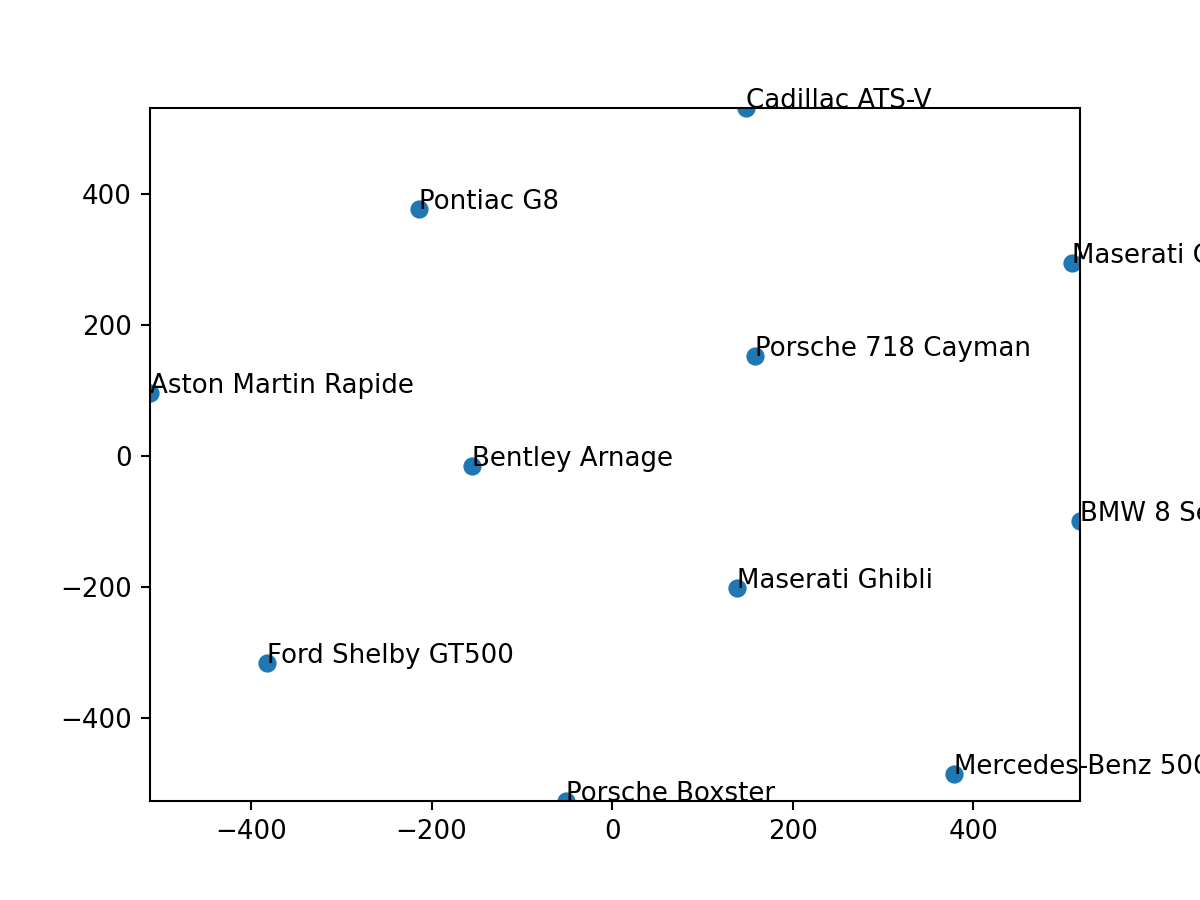

In [529]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 100)

# Convert GloVe word vectors into word2vect format

Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Gensim allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

In [538]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [545]:
glove_file = datapath('C:/User/PythonCode/NLP/WordEmbedding/data/glove.6B.100d.txt') # should use full path

In [548]:
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")

In [549]:
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [550]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [551]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [552]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [553]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [556]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [558]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [559]:
analogy('japan', 'japanese', 'australia')

'australian'

In [562]:
from sklearn.decomposition import PCA
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


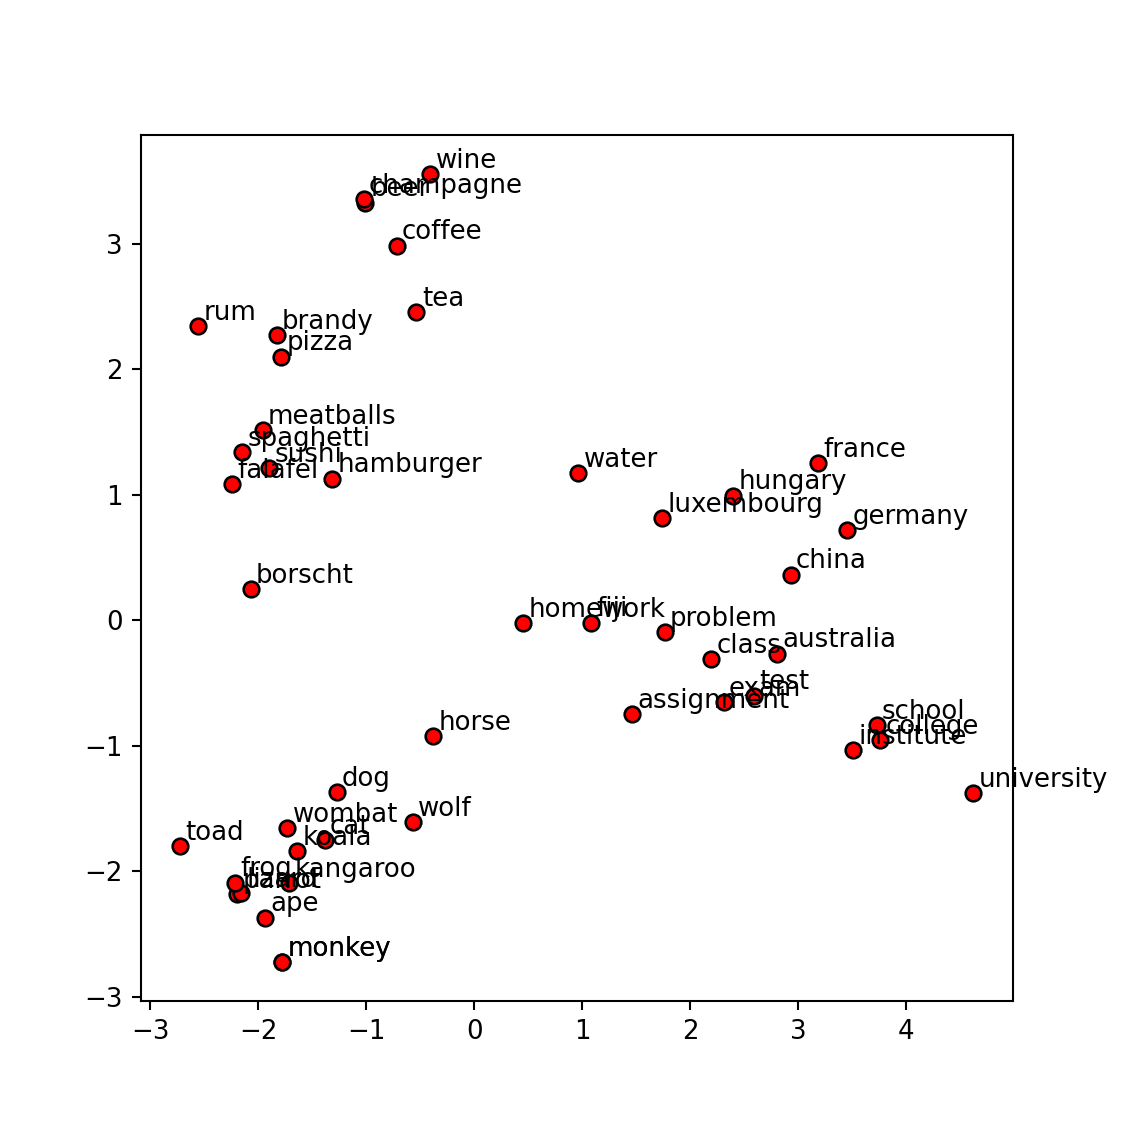

In [563]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])